In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
path=r"/content/drive/MyDrive/student_info.csv"


In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
df.shape

(200, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


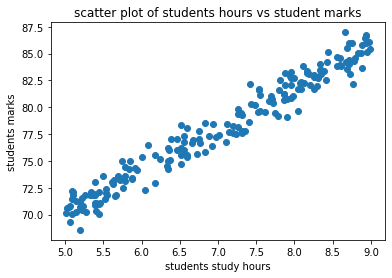

In [ ]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("students study hours")
plt.ylabel("students marks")
plt.title('scatter plot of students hours vs student marks')
plt.show()

In [ ]:
# data cleaning

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
df2=df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of x=",X.shape)
print("shape of y=",y.shape)

shape of x= (200, 1)
shape of y= (200, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)


In [ ]:
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [ ]:
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (160, 1)
shape of y_train (160, 1)
shape of x_test (40, 1)
shape of y_test (40, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[3.93571802]])

In [ ]:
lr.intercept_

array([50.44735504])

In [ ]:
m=3.93
c=50.44
y=m*4+c
y

66.16

In [ ]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.19

In [ ]:
y_pred=lr.predict(x_test)
y_pred

83.11381457512351

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

ValueError: ignored

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours", "student_marks_original", "student_marks_predicted"])

ValueError: ignored

ValueError: ignored

In [ ]:
lr.score(x_test,y_test)

0.9514124242154466

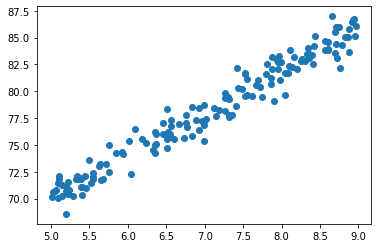

In [ ]:
plt.scatter(x_train,y_train)

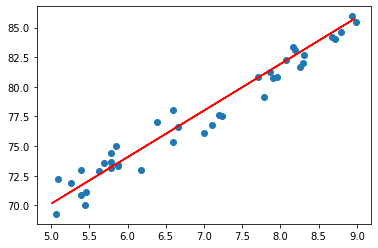

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,"student_mark_predictor.pkl")

['student_mark_predictor.pkl']